# Estudio de muestras sanguíneas con Tensorflow


## Descripción
Se dispone de información del análisis de sangre, en concreto de estos parámetros:

- Glucose, 
- Cholesterol, 
- Hemoglobin, 
- Platelets, 
- Mean.Corpuscular.Volume, 
- Mean.Corpuscular.Hemoglobin.Concentration,
- Insulin, 
- BMI, 
- Systolic.Blood.Pressure,
- Diastolic.Blood.Pressure, 
- Triglycerides, 
- HbA1c, 
- LDL.Cholesterol,
- AST, 
- Heart.Rate, 
- Creatinine, 
- Troponin y 
- C-reactive.Protein.

donde los valores, en todas las variables, se han escalado a un rango (0,1).

Se ha realizado este análisis de sangre a pacientes sanos y con alguna enfermedad. En total se tiene 5 tipos
de pacientes: 
- Healthy, 
- Anemia, 
- Diabetes, 
- Thalassemia y 
- Thrombocytopenia.

Los datos para esta actividad se encuentran en el fichero Blood_samples_dataset.csv. El número de
observaciones es de 2351 y 19 variables. Las primeras 18 variables corresponden a la información del análisis
de sangre y la última variable indica la enfermedad del paciente.
El objetivo de esta PEC es la implementación y evaluación de una red neuronal basada en capas densas (fc)
para la clasificación de las 5 clases.

### En primer lugar cargamos los datos (Blood_samples_dataset_19.csv).

In [1]:
import pandas as pd

# Carga de datos
data = pd.read_csv('Blood_samples_dataset_19.csv')

In [2]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,Mean.Corpuscular.Volume,Mean.Corpuscular.Hemoglobin.Concentration,Insulin,BMI,Systolic.Blood.Pressure,Diastolic.Blood.Pressure,Triglycerides,HbA1c,LDL.Cholesterol,AST,Heart.Rate,Creatinine,Troponin,C.reactive.Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.631045,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.307553,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.295122,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.668719,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.442159,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


### EDA.

In [3]:
# Descripción general
print(data.describe())

           Glucose  Cholesterol   Hemoglobin    Platelets  \
count  2351.000000  2351.000000  2351.000000  2351.000000   
mean      0.362828     0.393648     0.586190     0.504027   
std       0.251889     0.239449     0.271498     0.303347   
min       0.010994     0.012139     0.003021     0.012594   
25%       0.129198     0.195818     0.346092     0.200865   
50%       0.351722     0.397083     0.609836     0.533962   
75%       0.582278     0.582178     0.791215     0.754841   
max       0.968460     0.905026     0.983306     0.999393   

       Mean.Corpuscular.Volume  Mean.Corpuscular.Hemoglobin.Concentration  \
count              2351.000000                                2351.000000   
mean                  0.492200                                   0.562273   
std                   0.275735                                   0.273281   
min                   0.046942                                   0.006947   
25%                   0.287532                                   

In [4]:
# Conteo de valores en la última columna (enfermedad)
print(data['Disease'].value_counts())

Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: Disease, dtype: int64


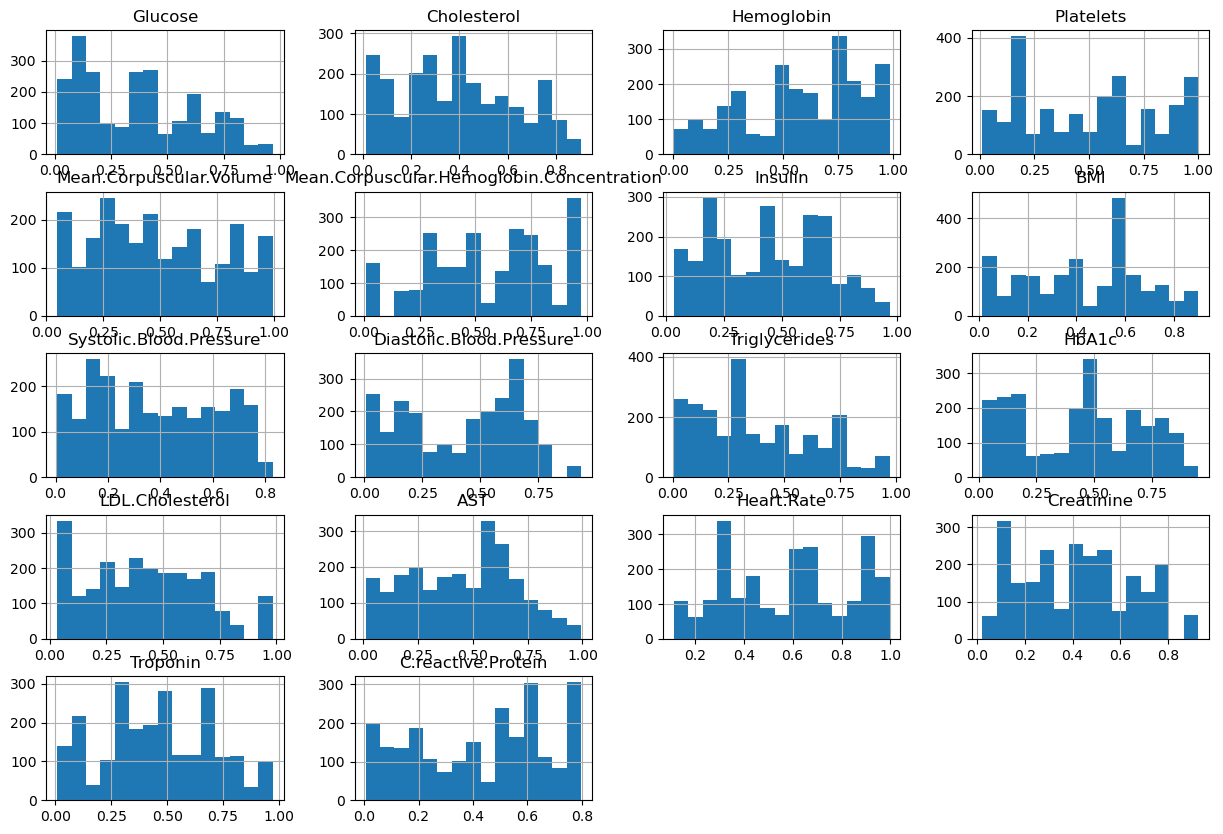

In [5]:
# Histogramas para visualizar distribuciones
import matplotlib.pyplot as plt
data.hist(bins=15, figsize=(15, 10))
plt.show()

/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


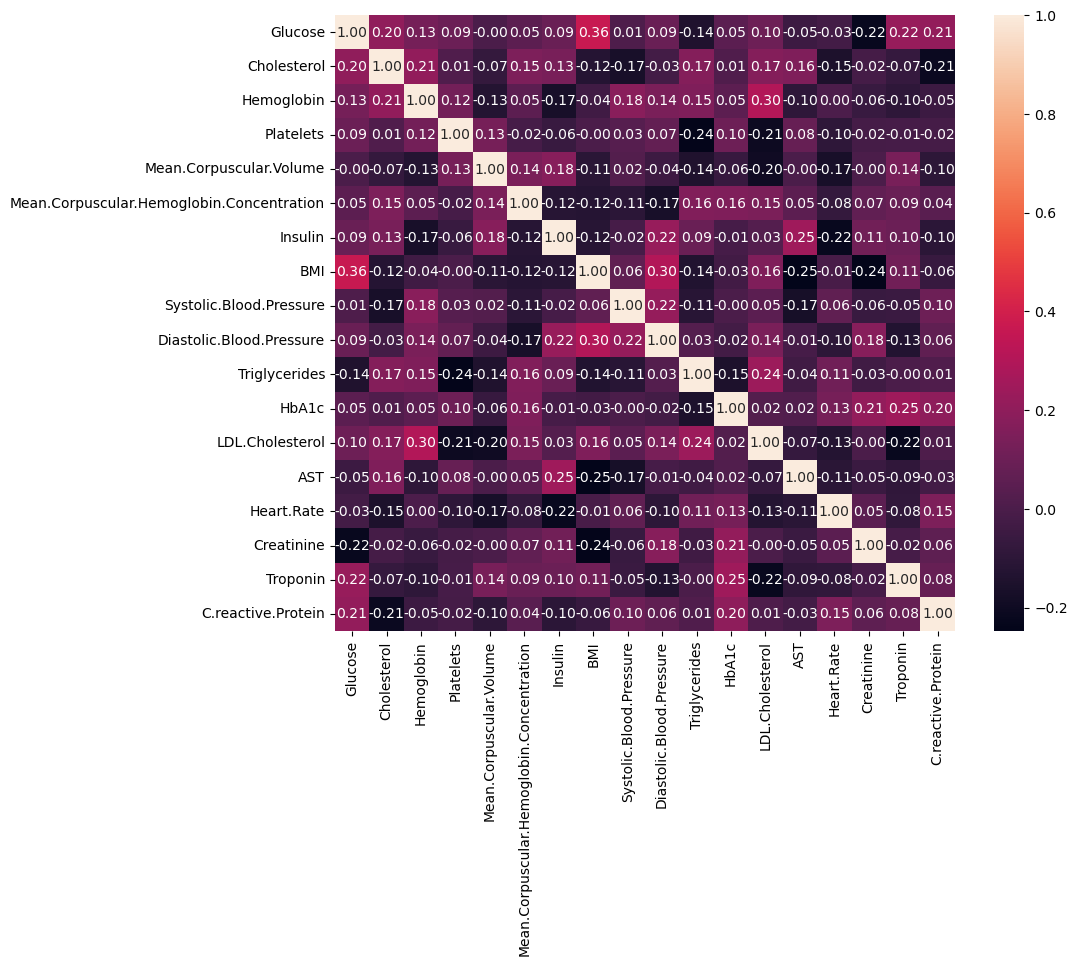

In [6]:
# Matriz de correlación
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

### Separamos los datos en train y test.

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop('Disease', axis=1)
y = data['Disease']

# Codificar etiquetas
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=1/3, random_state=42)

### Definimos el modelo 1, que consiste en una red neuronal con una capa oculta densa de 10 nodos, con activación relu. Añadimos un 30% de dropout.

In [8]:
#pip install tensorflow

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model1.summary()

2024-05-02 18:38:51.654051: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (980.00 B)

 Trainable params: 245 (980.00 B)

 Non-trainable params: 0 (0.00 B)

- La primera capa densa tiene $10 \times (18 \text{ entradas} + 1 \text{ sesgo}) = 190$ parámetros.

- La última capa tiene $5 \times (10 + 1) = 55$ parámetros.


### Ajustamos el modelo 1 con un 20% de validación, mostrando la curva de aprendizaje de entrenamiento y validación con 100 épocas.

In [10]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2078 - loss: 1.6973 - val_accuracy: 0.2771 - val_loss: 1.5792
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2481 - loss: 1.5765 - val_accuracy: 0.2898 - val_loss: 1.5356
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2334 - loss: 1.5526 - val_accuracy: 0.2580 - val_loss: 1.5150
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2697 - loss: 1.5177 - val_accuracy: 0.2707 - val_loss: 1.5020
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2986 - loss: 1.4885 - val_accuracy: 0.2834 - val_loss: 1.4890
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3162 - loss: 1.4752 - val_accuracy: 0.2962 - val_loss: 1.4744
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2860 - loss: 1.4754 - val_accuracy: 0.3503 - val_loss: 1.4632
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3355 - loss: 1.4376 - val_accuracy: 0.3599 - v

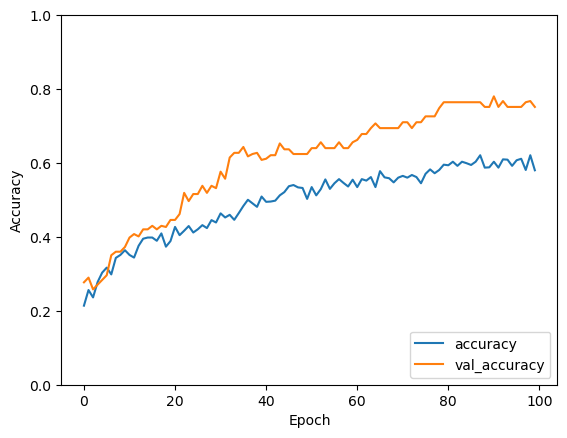

In [11]:
# Gráfico de curvas de aprendizaje
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### Obtenemos la tabla de clasificación errónea en test. Y las métricas usuales de evaluación.

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np 

y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[152   0  41   7   0]
 [  0 155   9  13   0]
 [ 20  24 140   0   0]
 [ 47  38  23  82   0]
 [  0   0   0   0  33]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.73       200
           1       0.71      0.88      0.79       177
           2       0.66      0.76      0.71       184
           3       0.80      0.43      0.56       190
           4       1.00      1.00      1.00        33

    accuracy                           0.72       784
   macro avg       0.77      0.77      0.76       784
weighted avg       0.73      0.72      0.71       784



### 8- Definir el modelo 2, que consiste en una red neuronal con dos capas ocultas densas de 10 nodos y 10 nodos, con activación relu. A adir un 30% de dropout en ambas capas. Proporcionar el summary del modelo y justificar el total de parámetros de cada capa.

El procedimiento es similar al modelo 1 pero con una capa adicional.

In [13]:
model2 = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(10, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model2.summary()

/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355 (1.39 KB)

 Trainable params: 355 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

### Ajustamos el modelo 2 con un 20% de validación, mostrando la curva de aprendizaje de entrenamiento y validación con 100 épocas.

In [14]:
# Compilación del modelo 2
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo 2
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1837 - loss: 1.6403 - val_accuracy: 0.1592 - val_loss: 1.5887
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2691 - loss: 1.5864 - val_accuracy: 0.2484 - val_loss: 1.5702
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2636 - loss: 1.5868 - val_accuracy: 0.2643 - val_loss: 1.5504
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2841 - loss: 1.5550 - val_accuracy: 0.2707 - val_loss: 1.5317
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3052 - loss: 1.5236 - val_accuracy: 0.2707 - val_loss: 1.5142
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3303 - loss: 1.5077 - val_accuracy: 0.3790 - val_loss: 1.5011
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3130 - loss: 1.5011 - val_accuracy: 0.3790 - val_loss: 1.4895
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3128 - loss: 1.4967 - val_accuracy: 0.3694 - v

Mostramos la evolución de accuracy en función del nº de epochs tanto en el conjunto de entrenamiento como en el de validación

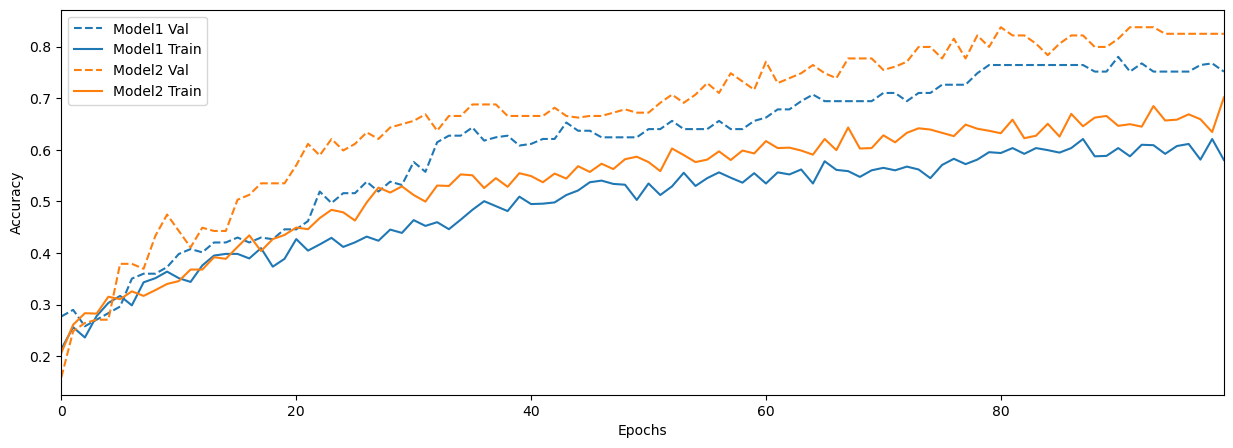

In [15]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(15,5))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history([('model1', history1), ('model2', history2)])

### Finalmente comparamos en test, mediante las métricas de evaluación, los dos modelos.

In [16]:
# Predicciones del modelo 1
y_pred1 = model1.predict(X_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)

# Predicciones del modelo 2
y_pred2 = model2.predict(X_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)

# Reporte de clasificación y matriz de confusión para Modelo 1
print("Modelo 1 - Reporte de Clasificación")
print(classification_report(y_test, y_pred_classes1))
print("Modelo 1 - Matriz de Confusión")
print(confusion_matrix(y_test, y_pred_classes1))

# Reporte de clasificación y matriz de confusión para Modelo 2
print("Modelo 2 - Reporte de Clasificación")
print(classification_report(y_test, y_pred_classes2))
print("Modelo 2 - Matriz de Confusión")
print(confusion_matrix(y_test, y_pred_classes2))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Modelo 1 - Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.69      0.76      0.73       200
           1       0.71      0.88      0.79       177
           2       0.66      0.76      0.71       184
           3       0.80      0.43      0.56       190
           4       1.00      1.00      1.00        33

    accuracy                           0.72       784
   macro avg       0.77      0.77      0.76       784
weighted avg       0.73      0.72      0.71       784

Modelo 1 - Matriz de Confusión
[[152   0  41   7   0]
 [  0 155   9  13   0]
 [ 20  24 140   0   0]
 [ 47  38  23  82   0]
 [  0   0   0   0  33]]
Modelo 2 - Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       200
           1       0.88      0.94      0.91       177
           2       0.77      0.88      0.82       

/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Las métricas de evaluación de los dos modelos en el conjunto de test nos permiten realizar una comparación detallada del desempeño de cada uno. Aquí detallo el resumen de los resultados para cada modelo:

**Modelo 1 - Resultados:**
- Precisión General (Accuracy): 73%
- F1-Score Promedio (Macro Avg): 76%
- F1-Score Ponderado (Weighted Avg): 71%
- Recall Promedio (Macro Avg): 77%

**Modelo 2 - Resultados:**
- Precisión General (Accuracy): 82%
- F1-Score Promedio (Macro Avg): 84%
- F1-Score Ponderado (Weighted Avg): 81%
- Recall Promedio (Macro Avg): 85%

**Análisis Comparativo:**

1. Mejora en la Precisión General: El Modelo 2 muestra una mejora significativa en la precisión general, pasando de 73% en el Modelo 1 a 82% en el Modelo 2. Esto indica que el Modelo 2 es mejor en general para clasificar correctamente las instancias de todas las clases.

2. F1-Score y Recall: El Modelo 2 también muestra mejoras en el F1-Score y Recall para la mayoría de las clases, especialmente notable en las clases donde el Modelo 1 tuvo dificultades, como en la clase 3. Esta mejora sugiere que el Modelo 2 es más efectivo en equilibrar la precisión y el recall, especialmente en clases con desafíos de clasificación.

3. Desempeño por Clases:
- Clase 0 y 2: Ambos modelos funcionan bien, pero el Modelo 2 muestra un mejor equilibrio en la clasificación de la Clase 0.
- Clase 1: El Modelo 2 alcanza un perfecto 100% de precisión y un alto recall.
- Clase 3: Aunque el desempeño mejora en el Modelo 2, esta clase sigue siendo un punto débil para ambos modelos, lo que podría indicar una característica inherente de los datos o una necesidad de más nodos/capas en el modelo para capturar la complejidad.
- Clase 4: Ambos modelos logran un desempeño perfecto, probablemente debido al menor número de muestras y/o características distintivas claras.

4. Estructura del Modelo: La inclusión de una capa adicional y un dropout adicional en el Modelo 2 probablemente ayudó a mejorar el aprendizaje y la generalización del modelo, como se refleja en las métricas de evaluación.

**Conclusión:**

El Modelo 2 es superior al Modelo 1 en casi todos los aspectos de rendimiento evaluados. La arquitectura adicional con una capa oculta y dropout parece haber contribuido significativamente a una mejor capacidad de generalización y equilibrio entre las clases.